<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [4]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.

from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense, Dropout   # for creating fully connected neural network layers.

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/AI and Machine Learning/Project 4/Churn.csv')
data = df.copy()

## Data Overview

In [7]:
#Check for number of attributes and samples in the dataset
data.shape

(10000, 14)

In [8]:
#Check top rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
# Check for null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# Check for duplicate samples
data.duplicated().sum()

0

In [13]:
#Row number, Customer_id and surname do not add any value to analysis. Dropping these atributes
data.drop(columns = ['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

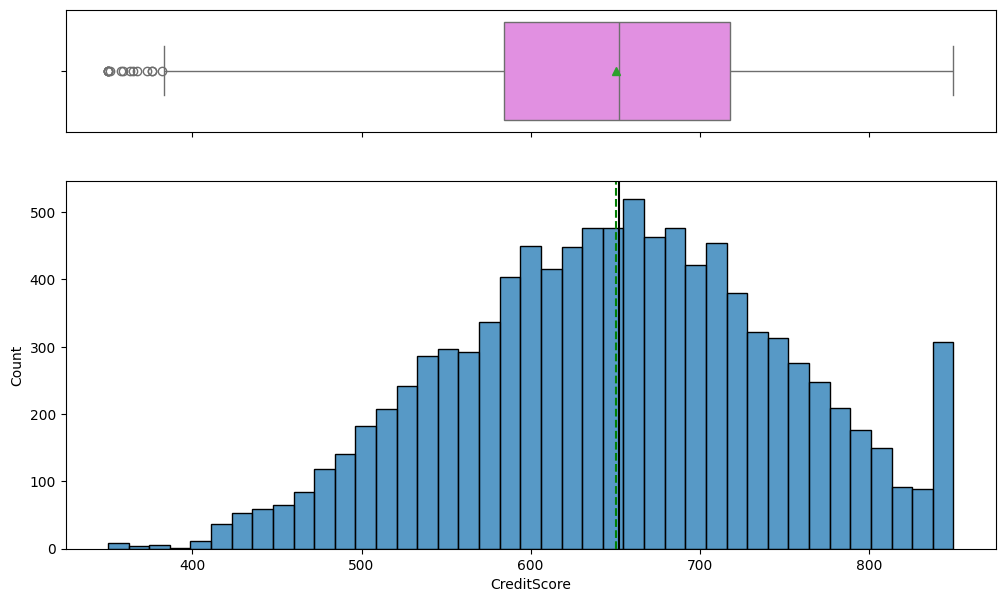

In [18]:
# Credit score distribution
histogram_boxplot(data,'CreditScore')

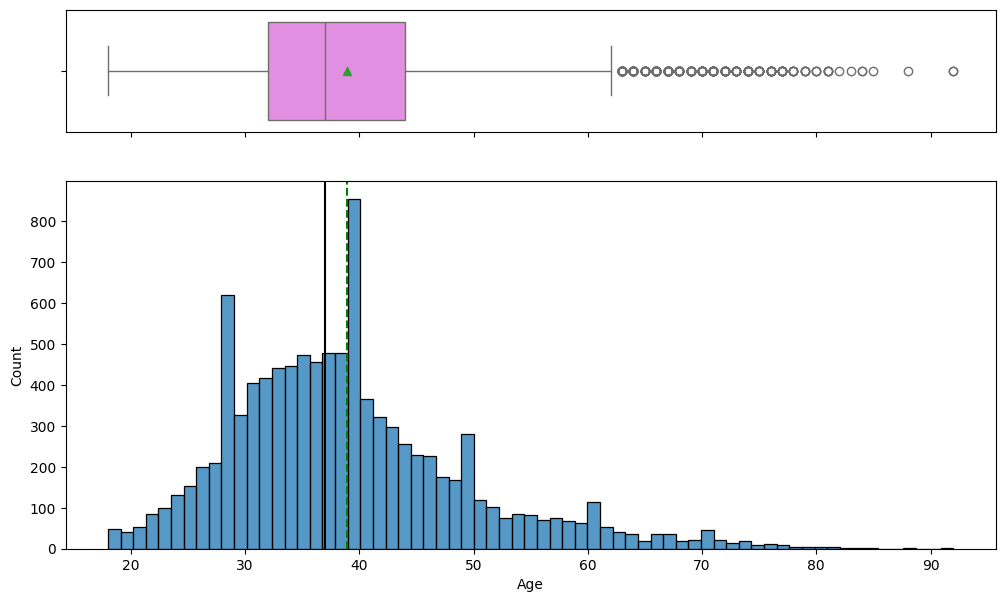

In [19]:
# Age distribution
histogram_boxplot(data,'Age')

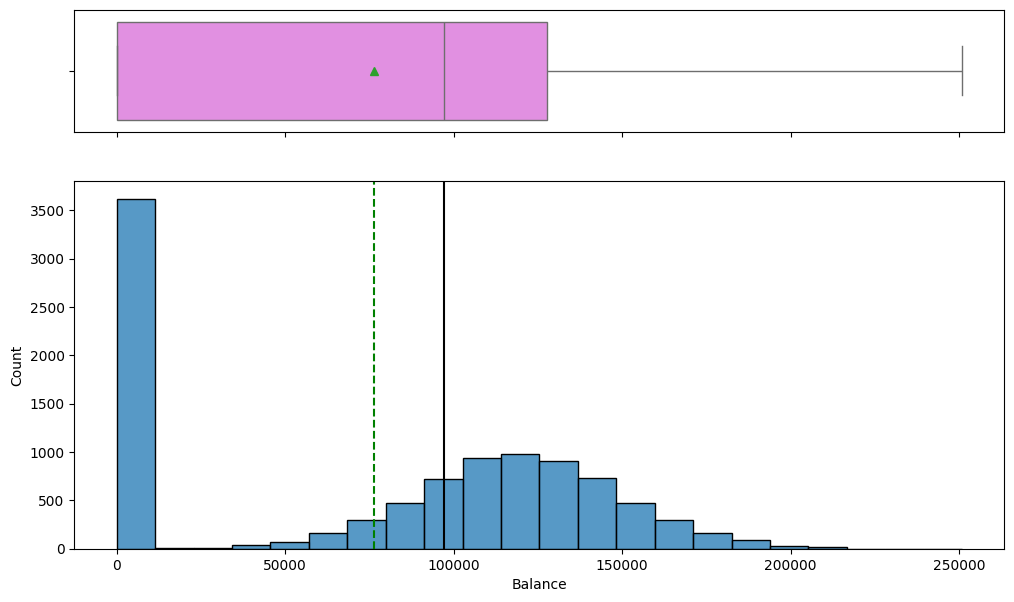

In [20]:
# Balance distribution
histogram_boxplot(data,'Balance')

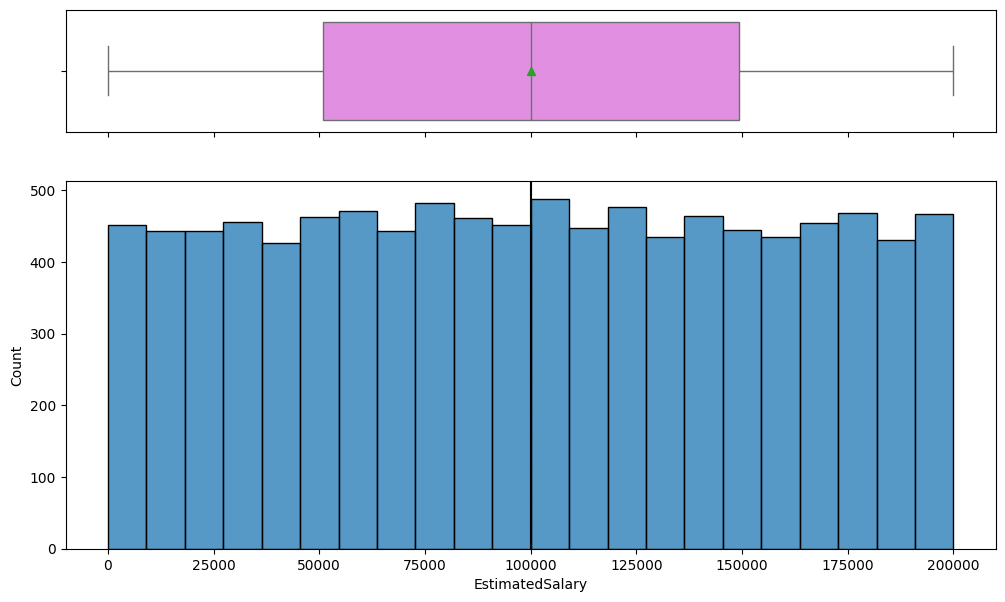

In [21]:
# Estimated Salary distribution
histogram_boxplot(data,'EstimatedSalary')

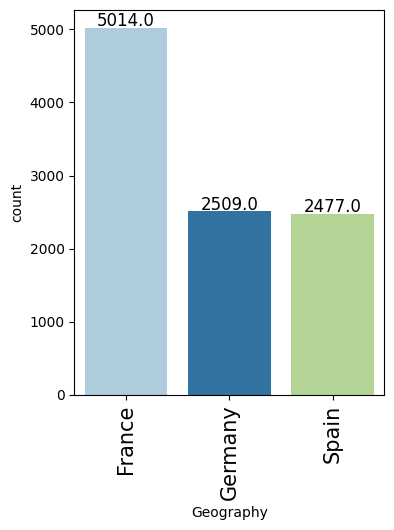

In [22]:
#Geography counts
labeled_barplot(data,'Geography')

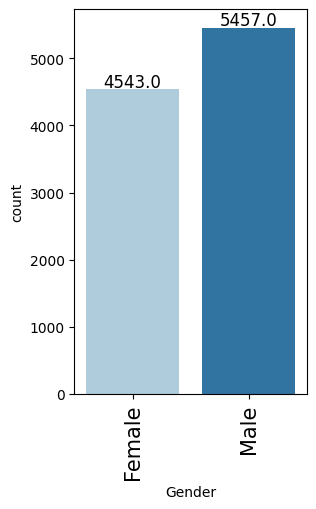

In [23]:
#Gender counts
labeled_barplot(data,'Gender')

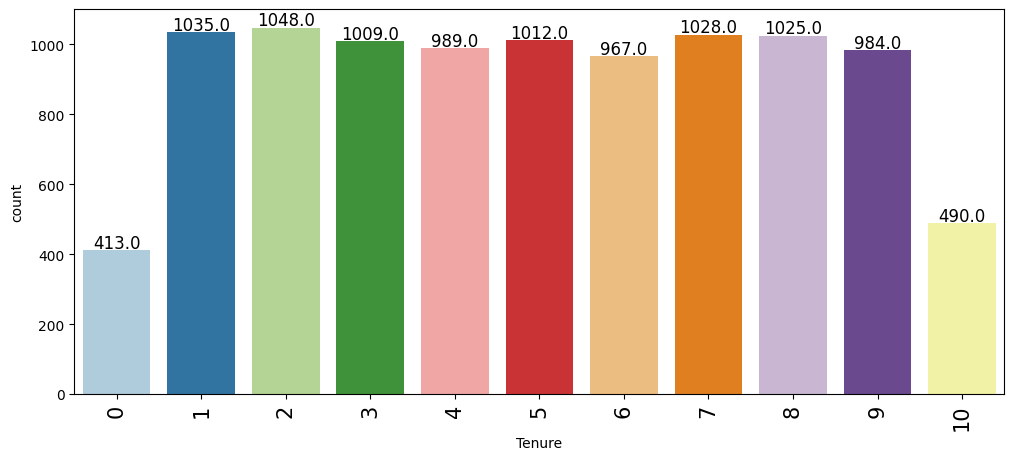

In [24]:
#Tenure counts
labeled_barplot(data,'Tenure')

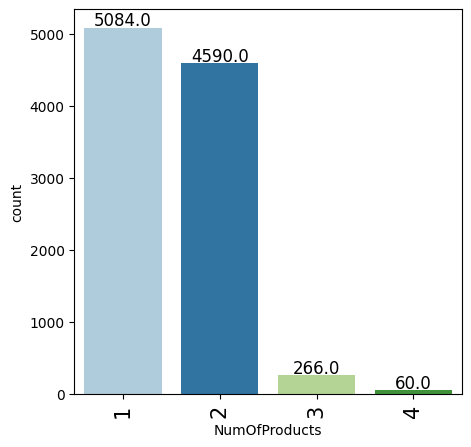

In [25]:
#NumOfProducts counts
labeled_barplot(data,'NumOfProducts')

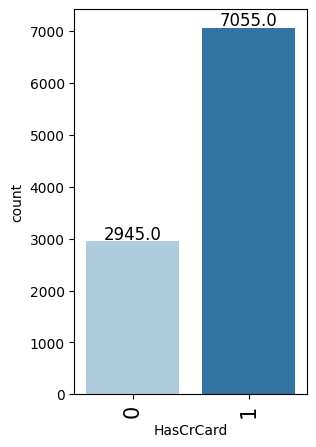

In [26]:
#How many have credit cards
labeled_barplot(data,'HasCrCard')

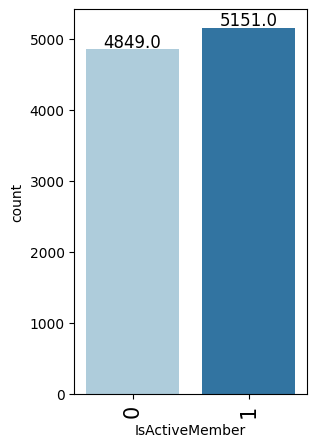

In [27]:
#Active members
labeled_barplot(data,'IsActiveMember')

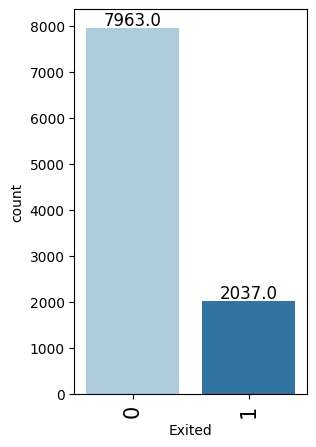

In [28]:
#Members who exited
labeled_barplot(data,'Exited')

### Bivariate Analysis

<Axes: >

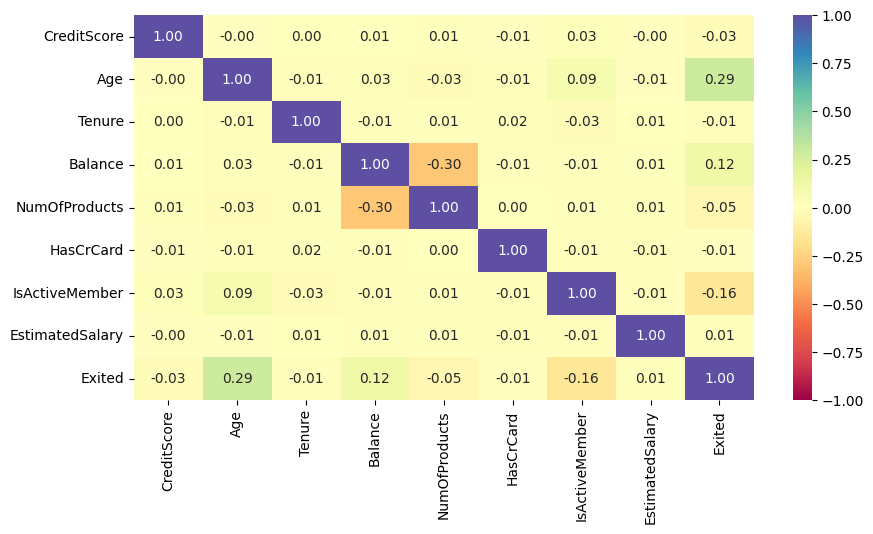

In [29]:
# Correlation Analysis
#numerical_columns = data.select_dtypes(include=['int', 'float'])

corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap = 'Spectral',fmt='.2f')

**Correlation Observations**

Age and exited(churn) are positively correlated implying that as age increases customers tend to exit the account.

Another interesting relation is the negative correlation between Balance and number of products with the bank. The bank might have offered incentives or promotions to customers with lower balances to encourage them to acquire more products.

**Note**: Though we have the correlation giving us relationships which are linear, it does not really help in modelling deep learning models as the main goal of deep learning models is to capture non-linearity in addition to the linearity of the variables.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


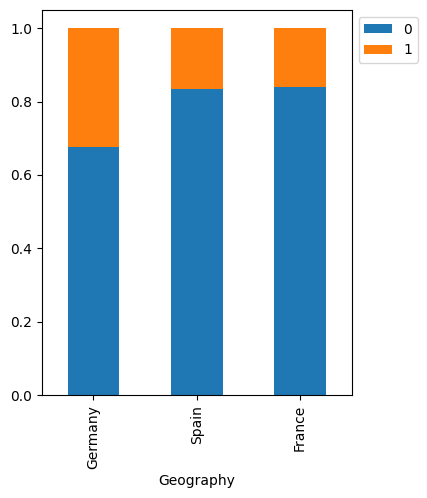

In [30]:
# Churn rate with respect to geography
stacked_barplot(data,'Geography','Exited')

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


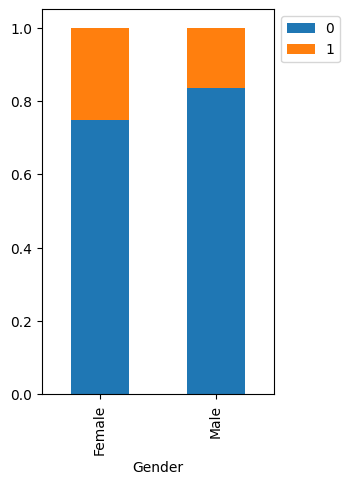

In [31]:
# Churn rate with respect to Gender
stacked_barplot(data,'Gender','Exited')

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


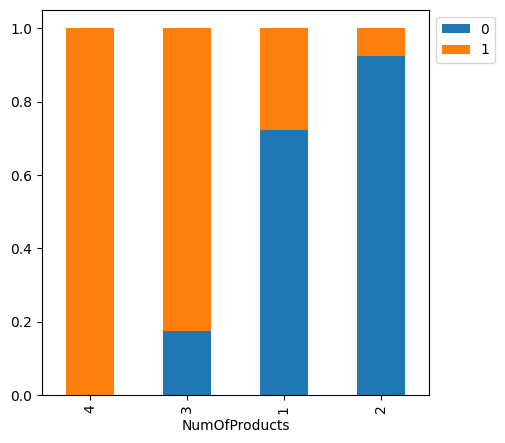

In [32]:
# Churn rate with respect to No. of products
stacked_barplot(data,'NumOfProducts','Exited')

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


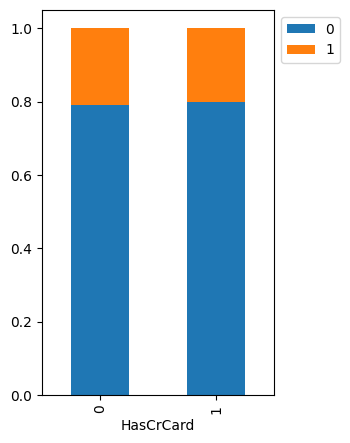

In [33]:
# Churn rate with respect to HasCrCard
stacked_barplot(data,'HasCrCard','Exited')

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


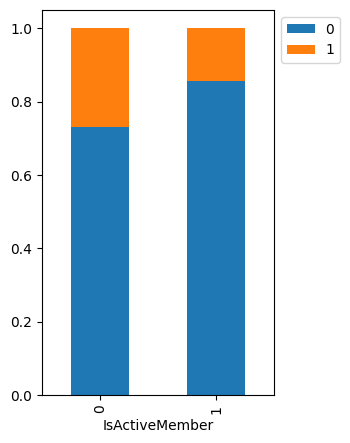

In [34]:
# Churn rate with respect to IsActiveMember
stacked_barplot(data,'IsActiveMember','Exited')

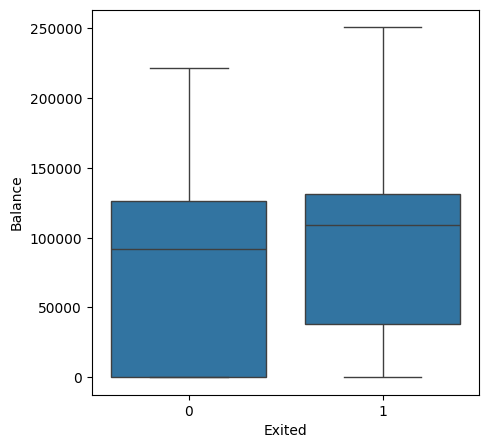

In [35]:
#Exited vs Balance
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()

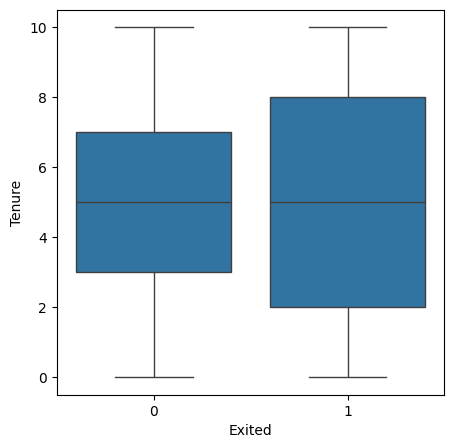

In [36]:
#Exited vs Tenure
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=data)
plt.show()

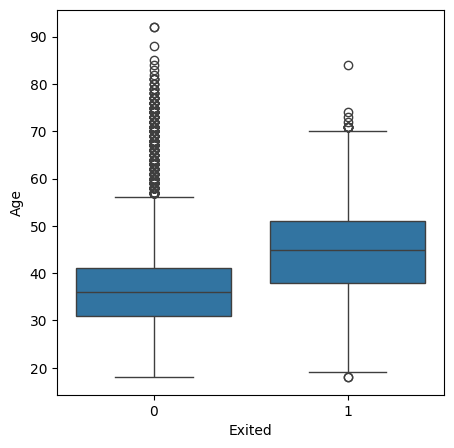

In [37]:
#Exited vs Age
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=data)
plt.show()

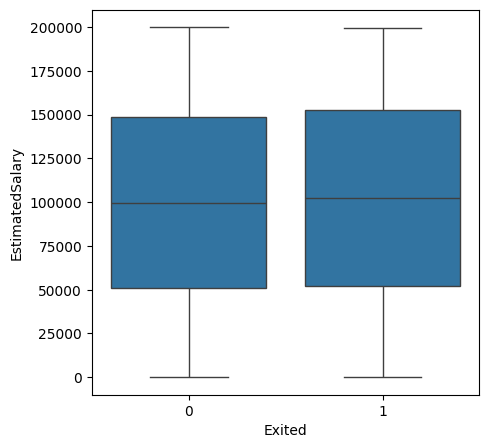

In [38]:
#Exited vs EstimatedSalary
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()

#### **EDA Observations:**

**Germany Has the Highest Churn Rate:**
After analyzing the data, it's found that customers from Germany exhibit the highest churn rate compared to other countries in the dataset. This indicates a potential area of focus for further investigation to understand the underlying reasons for the higher churn rate in Germany.

**Female Customers Exhibit a Higher Churn Rate:**
Upon examination, it's observed that female customers tend to churn at a higher rate compared to male customers. This demographic insight suggests the importance of gender-specific strategies for customer retention and engagement.

**Inactive Members Are Prone to Churn:**
The analysis reveals that inactive members, defined as customers with minimal or no recent activity, constitute a significant portion of churned customers. This highlights the critical role of customer engagement and retention efforts, especially for inactive members who may require targeted interventions to prevent churn.

**Churned Customers Have Higher Bank Balances:**
Surprisingly, churned customers are found to have higher average bank balances compared to non-churned customers. This unexpected finding contradicts the common assumption that customers with higher balances are more loyal. Further investigation is needed to understand the underlying factors contributing to this phenomenon, such as dissatisfaction with services or better offers from competitors.

**Negative Correlation Between Balance and Number of Products:**
An intriguing observation is the negative correlation between customers' bank balances and the number of products they hold with the bank. This suggests that customers with higher balances tend to have fewer products, while those with lower balances hold more products. Understanding this relationship can inform targeted marketing strategies to promote additional product adoption among high-balance customers and improve overall customer engagement.

## Data Preprocessing

### Train-validation-test Split

In [39]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
# Dependent and target varable split
X = data.drop(['Exited'],axis=1)
y = data['Exited']

In [41]:
#Train, Validation and Test data splits
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size=.20, random_state=1, stratify = y, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size=.25, random_state=1, stratify = y_large, shuffle=True)

In [42]:
print(X_large.shape[0])
print(X_test.shape[0])
print(X_train.shape[0])
print(X_val.shape[0])

8000
2000
6000
2000


### Dummy Variable Creation

In [43]:
#Creating dummy variables for Geography and Gender
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

In [44]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4472,660,23,6,166070.48,2,0,0,90494.72,True,False,False
4034,601,42,4,96763.89,1,1,1,199242.65,False,True,False
1454,521,34,7,70731.07,1,1,1,20243.97,False,True,False
9099,738,29,2,0.00,2,1,1,170421.13,False,False,True
2489,714,28,6,122724.37,1,1,1,67057.27,False,False,True


### Data Normalization

Different scale values have different weights while modelling and contribute differently during learning process. Bringing all the metrics to the same scale as these are on a different scale now.


In [45]:
#Normalization
columns = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
sc = StandardScaler()

X_train[columns] = sc.fit_transform(X_train[columns])
X_val[columns] = sc.transform(X_val[columns])
X_test[columns] = sc.transform(X_test[columns])

## Model Building

### Model Evaluation Criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.

Recall = TN/(TP+FN)


In [46]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [47]:
#Dataframes for storing recall values from all models
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [48]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [49]:
#Clear last session
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [50]:
# initializing the neural network
model_0 = Sequential()
model_0.add(Dense(64,activation = 'relu', input_dim=X_train.shape[1]))
model_0.add(Dense(32,activation='relu'))
model_0.add(Dense(1,activation='sigmoid'))
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
metric = keras.metrics.Recall()
optimizer = keras.optimizers.SGD(0.001)
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metric)

In [52]:
# Model fitting

batch_size = 64
epochs = 100

start = time.time()

history_0 = model_0.fit(X_train, y_train,
                    validation_data = (X_val,y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end=time.time()

Epoch 1/100
94/94 [==============================] - 5s 12ms/step - loss: 0.6343 - recall: 0.1244 - val_loss: 0.6116 - val_recall: 0.0466
Epoch 2/100
94/94 [==============================] - 1s 7ms/step - loss: 0.5993 - recall: 0.0221 - val_loss: 0.5819 - val_recall: 0.0049
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5741 - recall: 0.0049 - val_loss: 0.5602 - val_recall: 0.0025
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5554 - recall: 0.0000e+00 - val_loss: 0.5440 - val_recall: 0.0025
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5416 - recall: 0.0000e+00 - val_loss: 0.5317 - val_recall: 0.0000e+00
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5310 - recall: 0.0000e+00 - val_loss: 0.5223 - val_recall: 0.0000e+00
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5229 - recall: 0.0000e+00 - val_loss: 0.5150 - val_recall: 0.0000e+00
Epoch 8/100


**Loss Function**

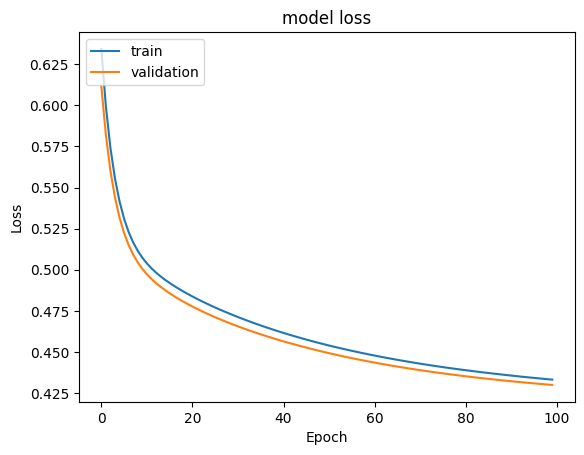

In [53]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

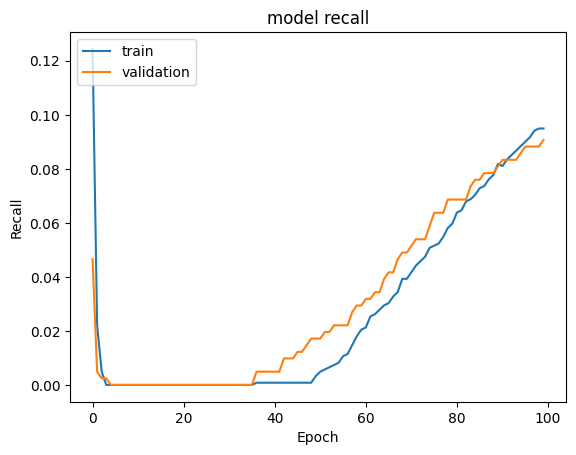

In [54]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [55]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 1s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [56]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [57]:
model_name = "ANN with SGD Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification**

In [58]:
#classification report on training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      4778
         1.0       0.60      0.10      0.17      1222

    accuracy                           0.80      6000
   macro avg       0.70      0.54      0.53      6000
weighted avg       0.77      0.80      0.74      6000



In [59]:
#classification report on validation set
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1592
         1.0       0.60      0.09      0.16       408

    accuracy                           0.80      2000
   macro avg       0.70      0.54      0.52      2000
weighted avg       0.77      0.80      0.74      2000



**Confusion Matrix**

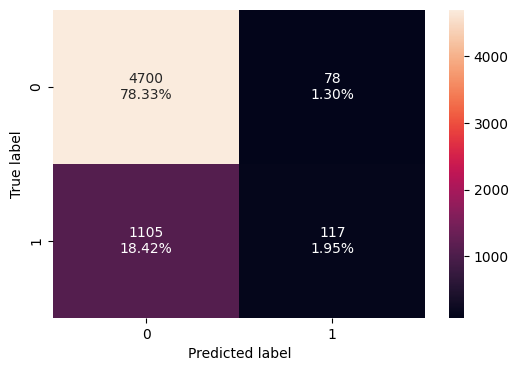

In [60]:
#Confusion matrix with training set
make_confusion_matrix(y_train, y_train_pred)

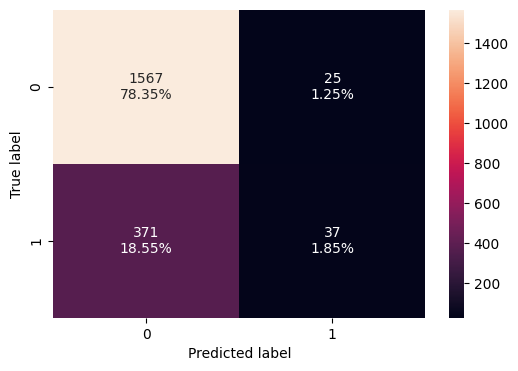

In [61]:
#Confusion matrix with validation set
make_confusion_matrix(y_val, y_val_pred)

**Observation:**
The above model has a poor recall performance on train and validation data. We will employ some techniques to improve performance in the coming models and try adaptive learning rate.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [62]:
#Clear last session
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [63]:
# initializing the neural network
model_1 = Sequential()
model_1.add(Dense(64,activation = 'relu', input_dim=X_train.shape[1]))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
metric = keras.metrics.Recall()
optimizer = keras.optimizers.Adam(0.001)
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metric)

In [65]:
batch_size = 64
epochs = 100

history_1 = model_1.fit(X_train, y_train, batch_size=batch_size,validation_data=(X_val,y_val), epochs=epochs)

Epoch 1/100
94/94 [==============================] - 3s 15ms/step - loss: 0.4775 - recall: 0.0524 - val_loss: 0.4268 - val_recall: 0.1422
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4260 - recall: 0.1948 - val_loss: 0.4124 - val_recall: 0.1740
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4136 - recall: 0.2602 - val_loss: 0.4035 - val_recall: 0.2721
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4034 - recall: 0.3020 - val_loss: 0.3994 - val_recall: 0.2623
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3934 - recall: 0.3208 - val_loss: 0.3954 - val_recall: 0.3088
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3854 - recall: 0.3445 - val_loss: 0.3897 - val_recall: 0.3750
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3770 - recall: 0.3699 - val_loss: 0.3823 - val_recall: 0.3431
Epoch 8/100
94/94 [=====================

**Loss function**

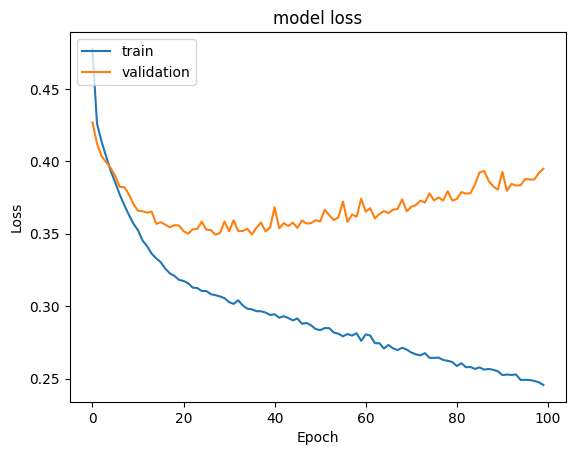

In [66]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

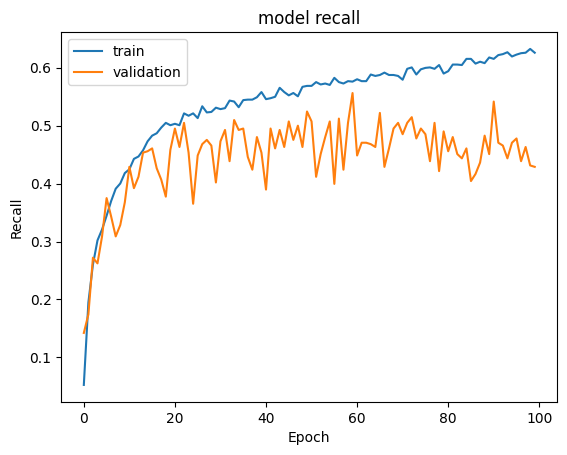

In [67]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [68]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [69]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [70]:
model_name = "ANN with Adam Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [71]:
#classification report on training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      4778
         1.0       0.88      0.59      0.71      1222

    accuracy                           0.90      6000
   macro avg       0.89      0.79      0.82      6000
weighted avg       0.90      0.90      0.89      6000



In [72]:
#classification report on validation set
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90      1592
         1.0       0.67      0.43      0.52       408

    accuracy                           0.84      2000
   macro avg       0.77      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000



**Confusion matrix**

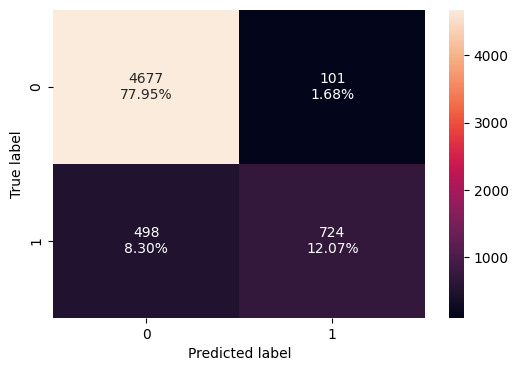

In [73]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

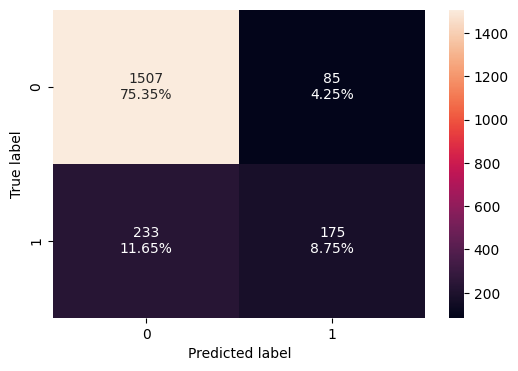

In [74]:
#Confusion matrix with validation set
make_confusion_matrix(y_val, y_val_pred)

**Observation:**
The above model overfitted as you can see that performance on train data was good but on the validation data was poor. We will employ some techniques in the coming models to avoid over fitting.

### Neural Network with Adam Optimizer and Dropout

**Dropout** is a regularization technique used in neural networks to prevent overfitting. Overfitting occurs when a model learns to memorize the training data rather than generalize from it. Dropout helps to address this issue by randomly dropping a proportion of neurons in the network during training.

In [75]:
#Clear last session
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [76]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Dropout 1
model_2.add(Dropout(0.2))
# Hidden layer 1
model_2.add(Dense(32,activation='relu'))
# Hidden layer 2
model_2.add(Dense(16,activation='relu'))
# Dropout 2
model_2.add(Dropout(0.1))
# Hidden layer 3
model_2.add(Dense(10,activation='relu'))
# Output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [77]:
metric = keras.metrics.Recall()
optimizer = keras.optimizers.Adam(0.001)
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metric)

In [78]:
batch_size = 64
epochs = 100

history_2 = model_2.fit(X_train, y_train, batch_size=batch_size,validation_data=(X_val,y_val), epochs=epochs)

Epoch 1/100
94/94 [==============================] - 4s 11ms/step - loss: 0.5140 - recall: 0.0401 - val_loss: 0.4560 - val_recall: 0.0000e+00
Epoch 2/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4597 - recall: 0.0016 - val_loss: 0.4344 - val_recall: 0.0000e+00
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4493 - recall: 0.0131 - val_loss: 0.4274 - val_recall: 0.0049
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4416 - recall: 0.0303 - val_loss: 0.4228 - val_recall: 0.0172
Epoch 5/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4392 - recall: 0.0573 - val_loss: 0.4215 - val_recall: 0.0539
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4336 - recall: 0.1146 - val_loss: 0.4183 - val_recall: 0.1691
Epoch 7/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4283 - recall: 0.1735 - val_loss: 0.4150 - val_recall: 0.1985
Epoch 8/100
94/94 [=============

**Loss function**

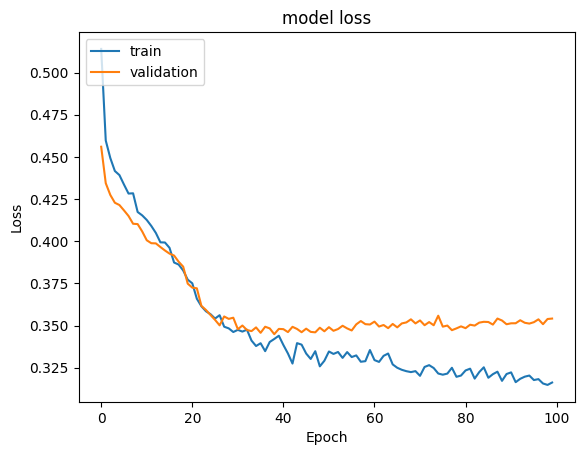

In [79]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

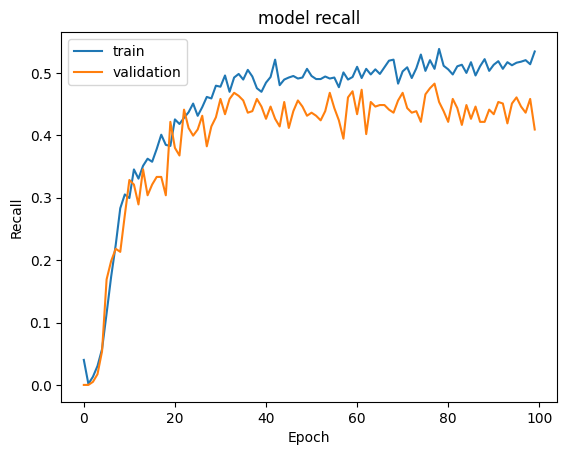

In [80]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [81]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [82]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [83]:
model_name = "ANN with Dropout and Adam Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [84]:
#classification report on training set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      4778
         1.0       0.85      0.52      0.65      1222

    accuracy                           0.88      6000
   macro avg       0.87      0.75      0.79      6000
weighted avg       0.88      0.88      0.87      6000



In [85]:
#classification report on validation set
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1592
         1.0       0.72      0.41      0.52       408

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.72      2000
weighted avg       0.83      0.85      0.83      2000



**Confusion matrix**

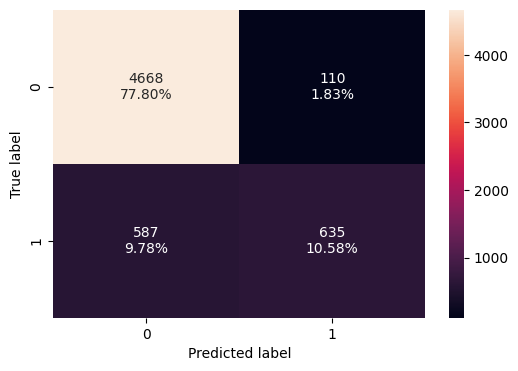

In [86]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

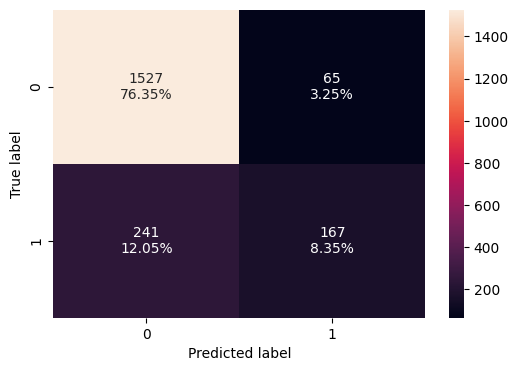

In [87]:
#Confusion matrix with validation set
make_confusion_matrix(y_val, y_val_pred)

Dropout did not help a lot. In the nex model tet us try oversampling technique to hanlde the imbalance in the target varaible.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**SMOTE** (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in machine learning datasets, particularly in binary classification problems where one class is significantly less frequent than the other. It works by generating synthetic samples of the minority class to balance the class distribution.

In [88]:
sm  = SMOTE(random_state=1)
#Applying SMOTE (Over sampling) on the training data to deal with the imbalanced data
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of X_train: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of y_train: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of X_train: (9556, 11)
After UpSampling, the shape of y_train: (9556,) 



In [89]:
#Clear last session
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [90]:
# initializing the neural network
model_3 = Sequential()
model_3.add(Dense(64,activation = 'relu', input_dim=X_train_smote.shape[1]))
model_3.add(Dense(16,activation='relu'))
model_3.add(Dense(10,activation='relu'))
model_3.add(Dense(1,activation='sigmoid'))
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1989 (7.77 KB)
Trainable params: 1989 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
metric = keras.metrics.Recall()
optimizer = keras.optimizers.SGD(.001)
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metric)

In [92]:
# Model fitting

batch_size = 64
epochs = 100

start = time.time()

history_3 = model_3.fit(X_train_smote, y_train_smote,
                    validation_data = (X_val,y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end=time.time()

Epoch 1/100
150/150 [==============================] - 2s 9ms/step - loss: 0.6974 - recall: 0.8171 - val_loss: 0.7308 - val_recall: 0.8186
Epoch 2/100
150/150 [==============================] - 1s 8ms/step - loss: 0.6943 - recall: 0.7846 - val_loss: 0.7215 - val_recall: 0.7745
Epoch 3/100
150/150 [==============================] - 1s 8ms/step - loss: 0.6916 - recall: 0.7526 - val_loss: 0.7137 - val_recall: 0.7353
Epoch 4/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6891 - recall: 0.7267 - val_loss: 0.7071 - val_recall: 0.7132
Epoch 5/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6867 - recall: 0.7114 - val_loss: 0.7015 - val_recall: 0.6936
Epoch 6/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6845 - recall: 0.7003 - val_loss: 0.6965 - val_recall: 0.6863
Epoch 7/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6824 - recall: 0.6907 - val_loss: 0.6919 - val_recall: 0.6838
Epoch 8/100
150/150 [======

**Loss Function**

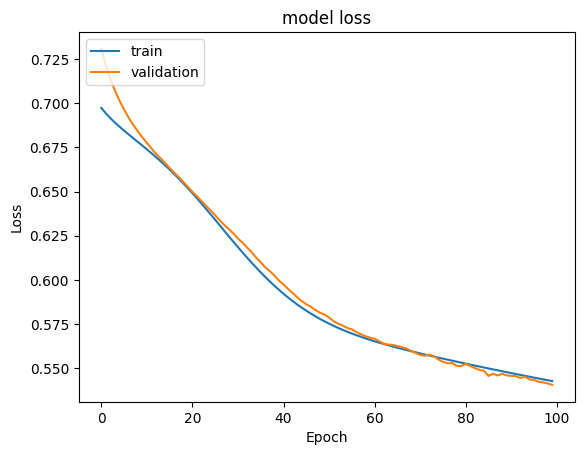

In [93]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

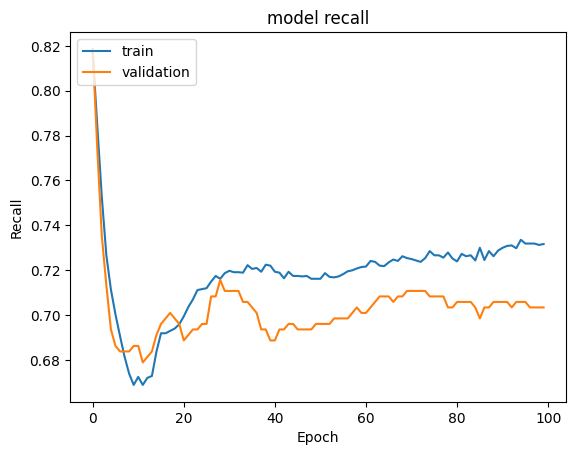

In [94]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [95]:
#Predicting the results using best as a threshold
y_train_pred = model_3.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [96]:
#Predicting the results using best as a threshold
y_val_pred = model_3.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [97]:
model_name = "ANN with SMOTE and SGD Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification**

In [98]:
#classification report on training set
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      4778
         1.0       0.73      0.73      0.73      4778

    accuracy                           0.73      9556
   macro avg       0.73      0.73      0.73      9556
weighted avg       0.73      0.73      0.73      9556



In [99]:
#classification report on validation set
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.81      1592
         1.0       0.41      0.70      0.51       408

    accuracy                           0.73      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.80      0.73      0.75      2000



**Confusion Matrix**

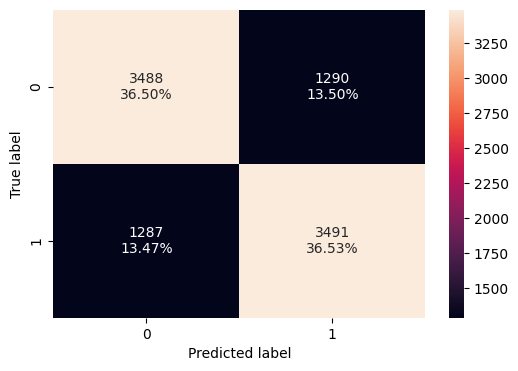

In [100]:
#Confusion matrix with training set
make_confusion_matrix(y_train_smote, y_train_pred)

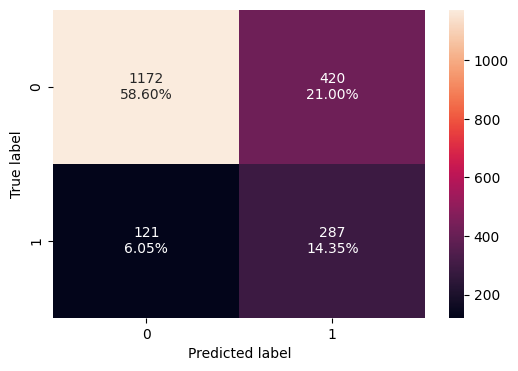

In [101]:
#Confusion matrix with validation set
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [102]:
#Clear last session
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [103]:
# initializing the neural network
model_4 = Sequential()
model_4.add(Dense(64,activation = 'relu', input_dim=X_train_smote.shape[1]))
model_4.add(Dense(16,activation='relu'))
model_4.add(Dense(10,activation='relu'))
model_4.add(Dense(1,activation='sigmoid'))
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1989 (7.77 KB)
Trainable params: 1989 (7.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
metric = keras.metrics.Recall()
optimizer = keras.optimizers.Adam(.001)
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metric)

In [105]:
# Model fitting

batch_size = 64
epochs = 100

start = time.time()

history_4 = model_4.fit(X_train_smote, y_train_smote,
                    validation_data = (X_val,y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end=time.time()

Epoch 1/100
150/150 [==============================] - 2s 7ms/step - loss: 0.5928 - recall: 0.7246 - val_loss: 0.5516 - val_recall: 0.7181
Epoch 2/100
150/150 [==============================] - 1s 6ms/step - loss: 0.5283 - recall: 0.7361 - val_loss: 0.4704 - val_recall: 0.6176
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.5015 - recall: 0.7378 - val_loss: 0.5317 - val_recall: 0.7377
Epoch 4/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4771 - recall: 0.7578 - val_loss: 0.4758 - val_recall: 0.6985
Epoch 5/100
150/150 [==============================] - 1s 6ms/step - loss: 0.4568 - recall: 0.7727 - val_loss: 0.4780 - val_recall: 0.7279
Epoch 6/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4415 - recall: 0.7838 - val_loss: 0.4684 - val_recall: 0.7157
Epoch 7/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4294 - recall: 0.7999 - val_loss: 0.4657 - val_recall: 0.7255
Epoch 8/100
150/150 [======

**Loss Function**

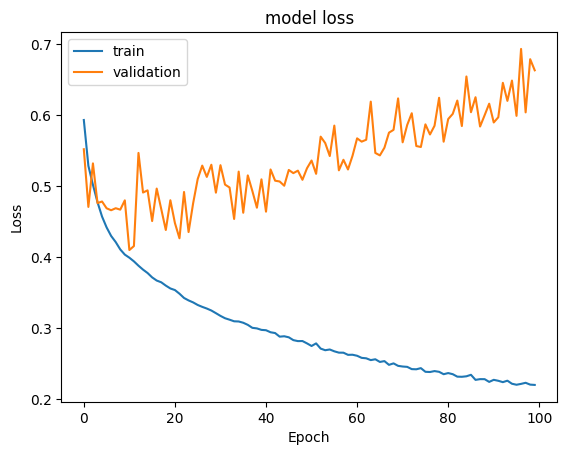

In [106]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

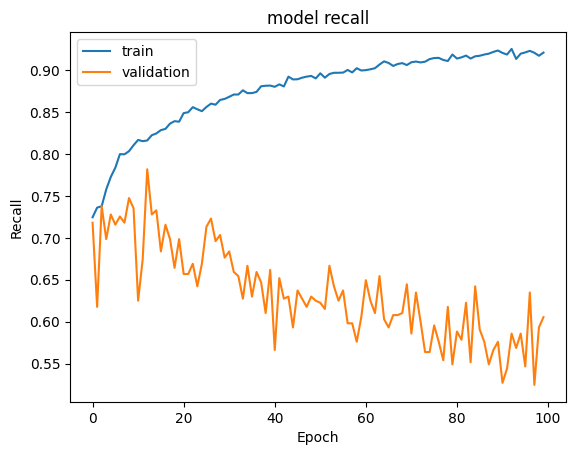

In [107]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [108]:
#Predicting the results using best as a threshold
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [109]:
#Predicting the results using best as a threshold
y_val_pred = model_4.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [110]:
model_name = "ANN with SMOTE and Adam Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification**

In [111]:
#classification report on training set
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92      4778
         1.0       0.90      0.95      0.92      4778

    accuracy                           0.92      9556
   macro avg       0.92      0.92      0.92      9556
weighted avg       0.92      0.92      0.92      9556



In [112]:
#classification report on validation set
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      1592
         1.0       0.46      0.61      0.52       408

    accuracy                           0.78      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.80      0.78      0.79      2000



**Confusion Matrix**

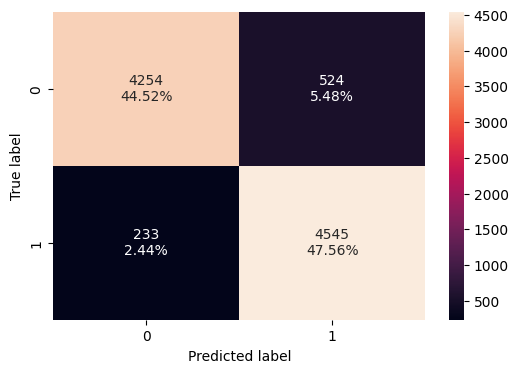

In [113]:
#Confusion matrix with training set
make_confusion_matrix(y_train_smote, y_train_pred)

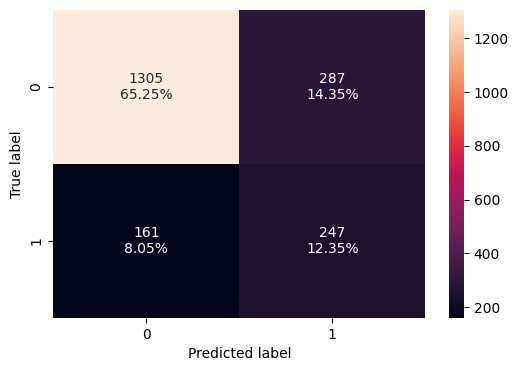

In [114]:
#Confusion matrix with validation set
make_confusion_matrix(y_val, y_val_pred)

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [115]:
#Clear last session
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [116]:
#Initializing the neural network
model_5 = Sequential()
#Adding the input layer with 64 neurons and relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
# Dropout 1
model_5.add(Dropout(0.2))
# Hidden layer 1
model_5.add(Dense(32,activation='relu'))
# Dropout 2
model_5.add(Dropout(0.1))
# Hidden layer 2
model_5.add(Dense(10,activation='relu'))
# Output layer.
model_5.add(Dense(1, activation = 'sigmoid'))

model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3189 (12.46 KB)
Trainable params: 3189 (12

In [117]:
metric = keras.metrics.Recall()
optimizer = keras.optimizers.Adam(.001)
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=metric)

In [118]:
# Model fitting

batch_size = 64
epochs = 100

start = time.time()

history_5 = model_5.fit(X_train_smote, y_train_smote,
                    validation_data = (X_val,y_val),
                    batch_size=batch_size,
                    epochs=epochs)
end=time.time()

Epoch 1/100
150/150 [==============================] - 3s 7ms/step - loss: 0.6245 - recall: 0.7187 - val_loss: 0.5293 - val_recall: 0.6593
Epoch 2/100
150/150 [==============================] - 1s 6ms/step - loss: 0.5614 - recall: 0.7179 - val_loss: 0.4985 - val_recall: 0.6520
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.5471 - recall: 0.7219 - val_loss: 0.5304 - val_recall: 0.7083
Epoch 4/100
150/150 [==============================] - 1s 5ms/step - loss: 0.5291 - recall: 0.7300 - val_loss: 0.5197 - val_recall: 0.6985
Epoch 5/100
150/150 [==============================] - 1s 8ms/step - loss: 0.5171 - recall: 0.7386 - val_loss: 0.4794 - val_recall: 0.6863
Epoch 6/100
150/150 [==============================] - 1s 8ms/step - loss: 0.4987 - recall: 0.7398 - val_loss: 0.4745 - val_recall: 0.6961
Epoch 7/100
150/150 [==============================] - 1s 8ms/step - loss: 0.4864 - recall: 0.7532 - val_loss: 0.4742 - val_recall: 0.7181
Epoch 8/100
150/150 [======

**Loss Function**

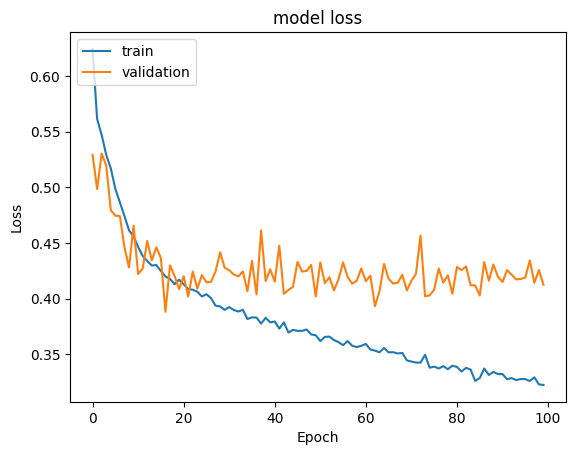

In [119]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

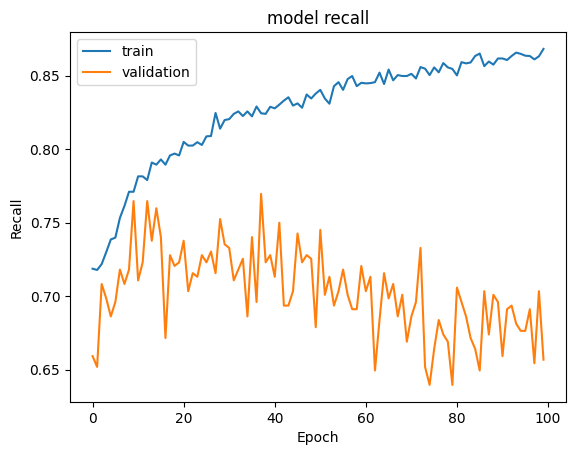

In [120]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [121]:
#Predicting the results using best as a threshold
y_train_pred = model_5.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 [==============================] - 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [122]:
#Predicting the results using best as a threshold
y_val_pred = model_5.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [123]:
model_name = "ANN with SMOTE, Dropout and Adam Optimizer"

train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification**

In [124]:
#classification report on training set
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      4778
         1.0       0.90      0.89      0.90      4778

    accuracy                           0.90      9556
   macro avg       0.90      0.90      0.90      9556
weighted avg       0.90      0.90      0.90      9556



In [125]:
#classification report on validation set
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      1592
         1.0       0.58      0.66      0.61       408

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.84      2000



**Confusion Matrix**

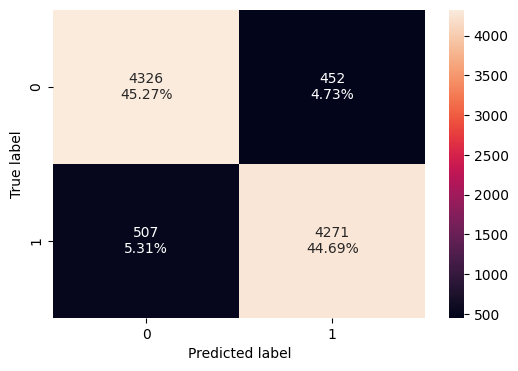

In [126]:
#Confusion matrix with training set
make_confusion_matrix(y_train_smote, y_train_pred)

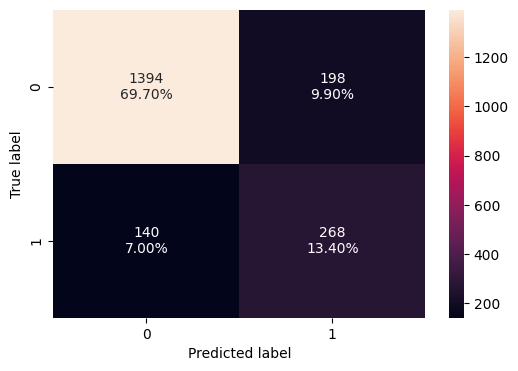

In [127]:
#Confusion matrix with validation set
make_confusion_matrix(y_val, y_val_pred)

## Model Performance Comparison and Final Model Selection

In [128]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
ANN with SGD Optimizer,0.095745
ANN with Adam Optimizer,0.592471
ANN with Dropout and Adam Optimizer,0.519640
ANN with SMOTE and SGD Optimizer,0.730640
ANN with SMOTE and Adam Optimizer,0.951235
"ANN with SMOTE, Dropout and Adam Optimizer",0.893889


In [129]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
ANN with SGD Optimizer,0.090686
ANN with Adam Optimizer,0.428922
ANN with Dropout and Adam Optimizer,0.409314
ANN with SMOTE and SGD Optimizer,0.703431
ANN with SMOTE and Adam Optimizer,0.605392
"ANN with SMOTE, Dropout and Adam Optimizer",0.656863


In [130]:
train_metric_df - valid_metric_df

,recall
ANN with SGD Optimizer,0.005058
ANN with Adam Optimizer,0.163550
ANN with Dropout and Adam Optimizer,0.110326
ANN with SMOTE and SGD Optimizer,0.027209
ANN with SMOTE and Adam Optimizer,0.345843
"ANN with SMOTE, Dropout and Adam Optimizer",0.237026


In [131]:
#Best model selection. Model 3 which is ANN with SMOTE and SGD optimizer has no overfitting. Training and Validation performances are close and the recall scores are not bad.
y_test_pred = model_3.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [132]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82      1593
         1.0       0.42      0.72      0.53       407

    accuracy                           0.74      2000
   macro avg       0.66      0.73      0.67      2000
weighted avg       0.81      0.74      0.76      2000



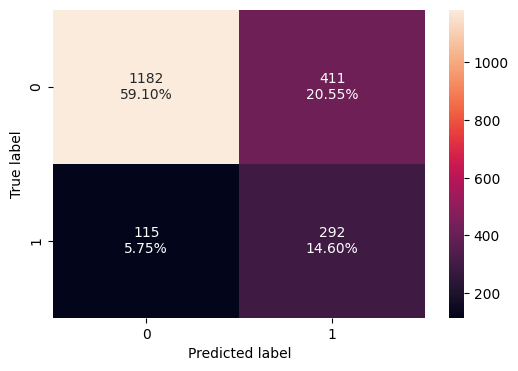

In [133]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

### **Justifications for choosing ANN with SMOTE and SGD optimizer model**

**Model_3 'ANN with SMOTE and SGD optimizer' has no overfitting. Training and Validation performances are close and the recall scores close to 73% are not bad.**

**Model_4 'ANN with SMOTE and Adam Optimizer' was not chosen even though the recall score is higher at 95% because this model is overfitting on the validation data with recall score at 60% on validation set.**

## Actionable Insights and Business Recommendations

**Targeted Customer Engagement Strategies:**

Insight:
Female customers exhibit a higher churn rate compared to male customers.

Recommendation:
Develop gender-specific customer engagement strategies to address the needs and preferences of female customers. This may include personalized communication, product offerings, and promotional campaigns tailored to female demographics.

**Retention Programs for Inactive Members:**

Insight: Inactive members are more prone to churn compared to active members.

Recommendation: Implement targeted retention programs aimed at re-engaging inactive members. This could involve personalized outreach, special offers, and incentives to encourage reactivation and prevent churn.

**Customer Satisfaction Analysis:**

Insight: Churned customers have higher average bank balances compared to non-churned customers.

Recommendation: Conduct a detailed analysis of customer satisfaction levels, service quality, and pain points experienced by high-balance customers. Identify areas for improvement and implement measures to enhance customer experience and loyalty, thereby reducing churn.

**Customer Lifecycle Management:**

Insight: There is a negative correlation between customers' bank balances and the number of products they hold with the bank.

Recommendation: Implement a comprehensive customer lifecycle management strategy to optimize product adoption and retention. Focus on cross-selling and upselling initiatives to encourage high-balance customers to explore additional products and services, thereby increasing customer lifetime value and loyalty.

**Market Segmentation and Personalization:**

Insight: Germany has the highest churn rate among all countries.

Recommendation: Segment customers based on geographical location, demographic factors, and behavioral patterns to better understand the unique needs and preferences of different customer segments, including those in Germany. Develop targeted marketing campaigns and personalized offerings to address the specific challenges and drivers of churn in each segment.

**Continuous Monitoring and Analysis:**

Recommendation:
 Establish a system for continuous monitoring of key performance indicators related to churn, customer satisfaction, and engagement metrics. Utilize advanced analytics techniques, such as predictive modeling and machine learning, to identify early warning signs of churn and proactively intervene to retain at-risk customers.

By implementing these actionable insights and recommendations, we can effectively address churn challenges, improve customer retention, and drive long-term profitability and growth for the bank. We may have to continuously evaluate the effectiveness of these strategies and iterate based on feedback and evolving customer needs.



<font size=6 color='blue'>Power Ahead</font>
___